In [6]:
from src.data.dataset import RoadSegDataModule
from src.models.UNet import SMPModel
import matplotlib.pyplot as plt
import torch

In [2]:
data_dir = "../data"
dm = RoadSegDataModule(data_dir=data_dir, batch_size=8)
dm.prepare_data()
dm.setup()

In [10]:
model = SMPModel.load_from_checkpoint("../logs/default/version_0/checkpoints/epoch=4-step=84.ckpt", arch="Unet", encoder_name="resnet34", in_channels=3, out_classes=1)

image shape: torch.Size([8, 3, 384, 384]), dtype: torch.uint8
mask shape: torch.Size([8, 1, 384, 384]), dtype: torch.float32


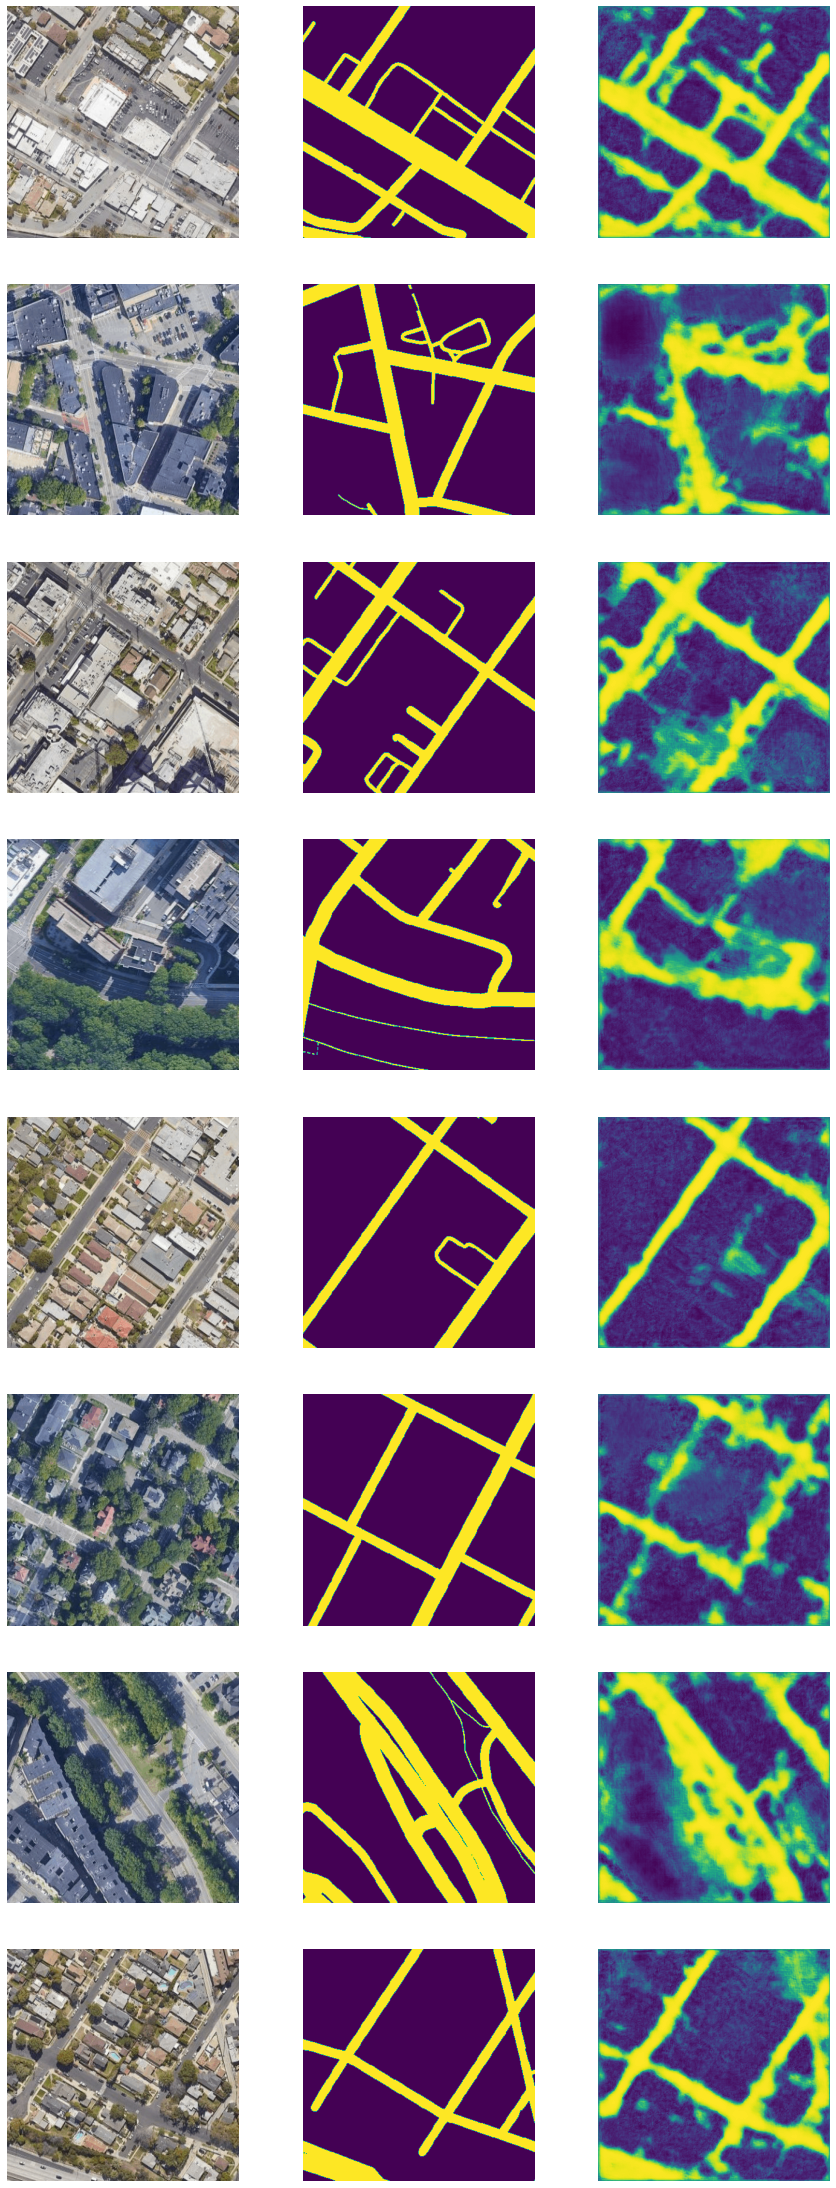

In [13]:
images, gt_masks = next(iter(dm.train_dataloader()))
print(f"image shape: {images.shape}, dtype: {images.dtype}")
print(f"mask shape: {gt_masks.shape}, dtype: {gt_masks.dtype}")

with torch.no_grad():
    model.eval()
    logits = model(images)
pr_masks = logits.sigmoid()

fig, axes = plt.subplots(len(images),3,figsize=(15,40))
for i, (image, gt_mask, pr_mask) in enumerate(zip(images, gt_masks, pr_masks)):
    axes[i, 0].imshow(image.numpy().transpose(1, 2, 0))
    axes[i, 1].imshow(gt_mask.numpy().squeeze())
    axes[i, 2].imshow(pr_mask.numpy().squeeze())
    axes[i, 0].set_axis_off()
    axes[i, 1].set_axis_off()
    axes[i, 2].set_axis_off()